In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/archive/sales_data.csv', encoding='latin1')
df.head()

print(df.info())
print(df.describe())

print(df.columns)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [127]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [128]:
print(df.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [129]:
df.drop(columns=['ADDRESSLINE2','TERRITORY'],inplace=True)

In [130]:
df['STATE'] = df['STATE'].fillna('Unknown')
df['POSTALCODE'] = df['POSTALCODE'].fillna(0)

In [131]:
print(df.isnull().sum())

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


In [132]:
categories =df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_12244\1617600853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRODUCTLINE', y='SALES', data=categories, palette='viridis')


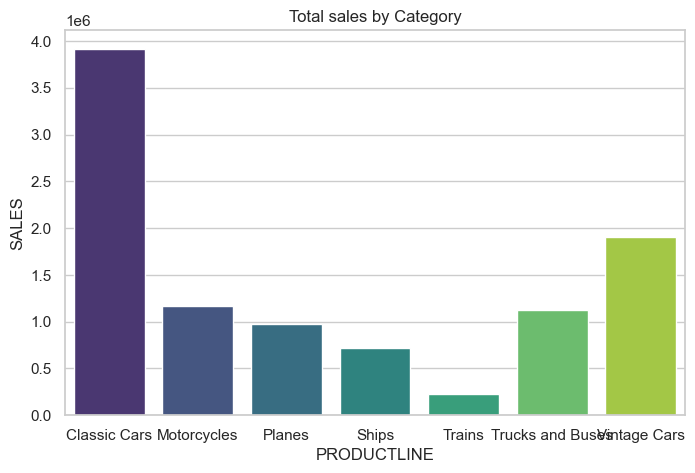

In [133]:
plt.figure(figsize=(8,5))
sns.barplot(x='PRODUCTLINE', y='SALES', data=categories, palette='viridis')
plt.title('Total sales by Category')
plt.show()

In [134]:
df['Month']= df['ORDERDATE'].dt.to_period('M')
monthly_sales = df.groupby('Month')['SALES'].sum()

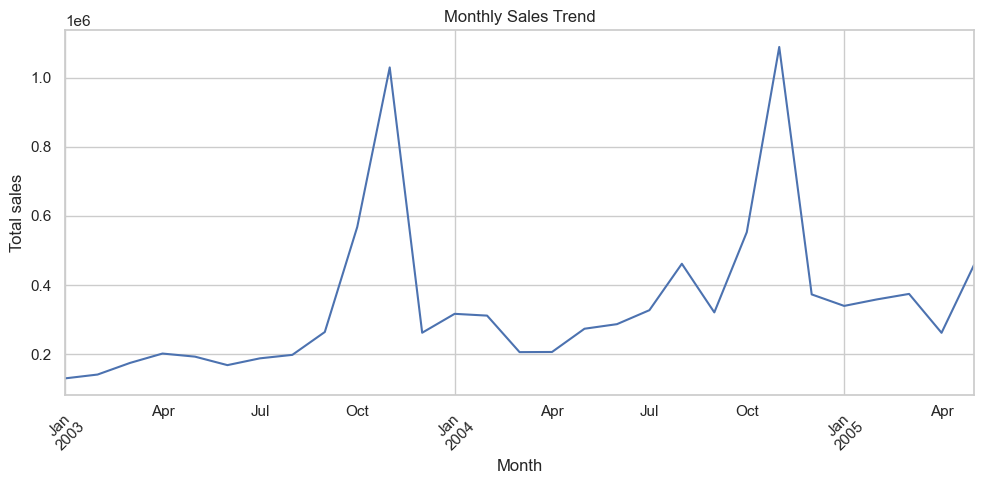

In [135]:
monthly_sales.plot(kind='line', figsize=(10,5),title='Monthly Sales Trend')
plt.ylabel('Total sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

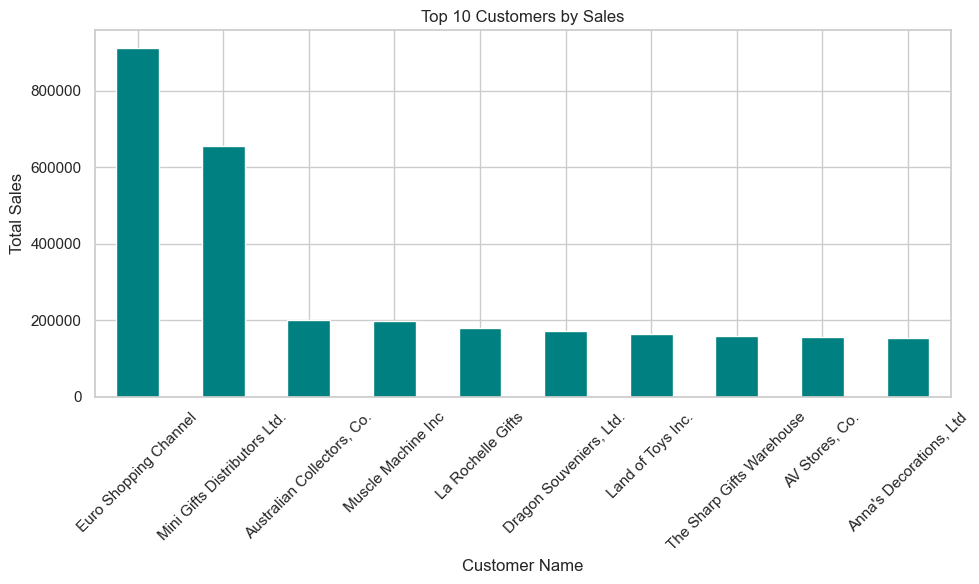

In [136]:
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_customers.plot(kind='bar', color='teal')
plt.title('Top 10 Customers by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Customer Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

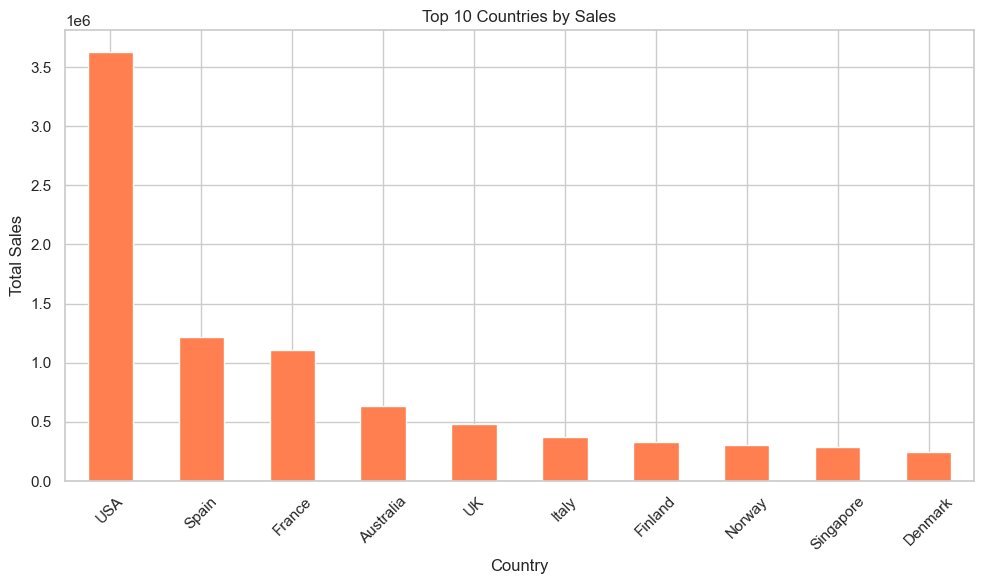

In [137]:
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
country_sales.plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

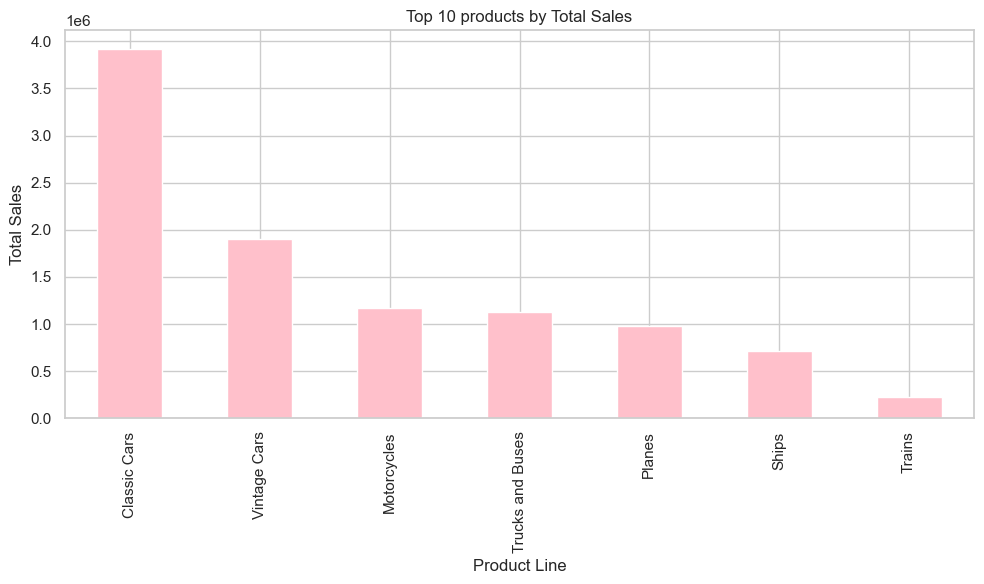

In [138]:
top_products = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='pink')
plt.title('Top 10 products by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product Line')
plt.tight_layout()
plt.show()

In [139]:
!pip install scikit-learn


df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['MONTH'] = df['ORDERDATE'].dt.to_period('M').dt.to_timestamp()

monthly_sales = df.groupby('MONTH')['SALES'].sum().reset_index()

monthly_sales['MonthOrdinal'] = monthly_sales['MONTH'].map(lambda x: x.toordinal())
print(monthly_sales.head())

Defaulting to user installation because normal site-packages is not writeable
       MONTH      SALES  MonthOrdinal
0 2003-01-01  129753.60        731216
1 2003-02-01  140836.19        731247
2 2003-03-01  174504.90        731275
3 2003-04-01  201609.55        731306
4 2003-05-01  192673.11        731336



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = monthly_sales['MonthOrdinal'].values.reshape(-1, 1)
y = monthly_sales['SALES'].values
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [141]:
from datetime import datetime, timedelta

next_month_date = monthly_sales['MONTH'].max() + pd.DateOffset(months=1)
next_month_ordinal = np.array([[next_month_date.toordinal()]])
predicted_sales = model.predict(next_month_ordinal)

print(f" Predicted Sales for {next_month_date.strftime('%B %Y')}: {predicted_sales[0]:,.2f}")


 Predicted Sales for June 2005: 495,015.31


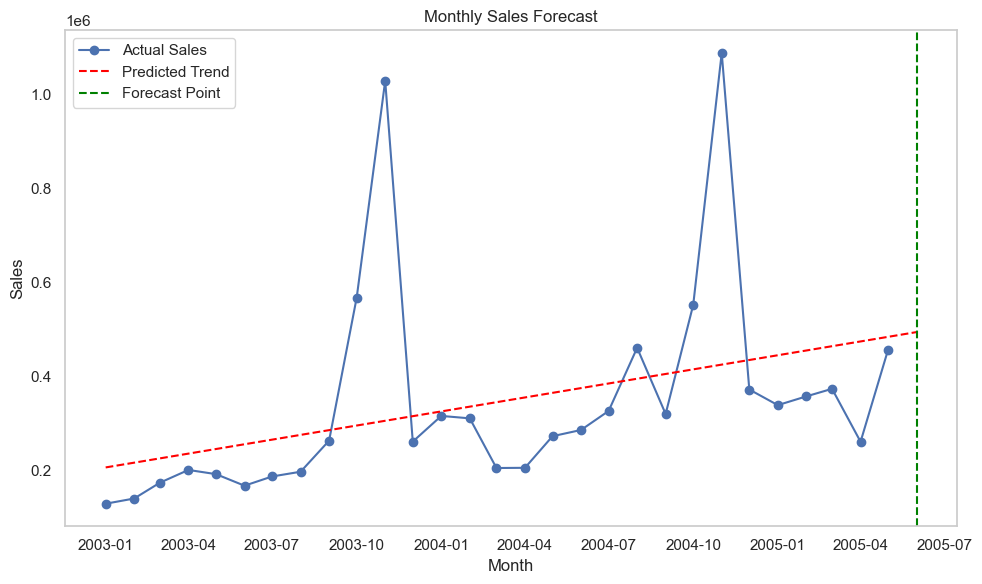

In [142]:

plt.figure(figsize=(10,6))
plt.plot(monthly_sales['MONTH'], y, label='Actual Sales', marker='o')

X_all = np.append(X, next_month_ordinal)
y_pred_all = model.predict(X_all.reshape(-1,1))

plt.plot(pd.to_datetime([datetime.fromordinal(int(i)) for i in X_all]), y_pred_all, 
         label='Predicted Trend', linestyle='--', color='red')

plt.axvline(next_month_date, color='green', linestyle='--', label='Forecast Point')
plt.title('Monthly Sales Forecast')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [143]:
monthly_sales.to_csv("monthly_sales_predictions.csv", index=False)


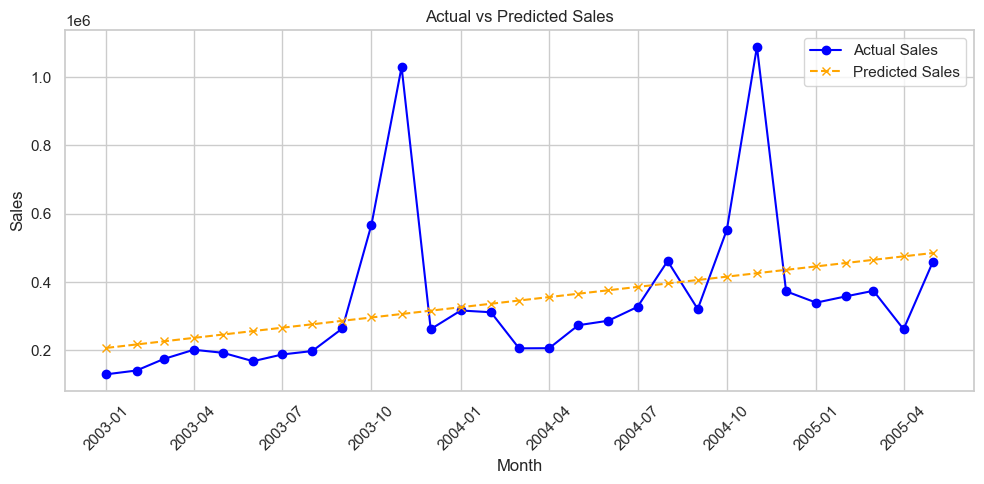

In [ ]:

monthly_sales['PREDICTED_SALES'] = model.predict(X)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['MONTH'], monthly_sales['SALES'], label='Actual Sales', color='blue', marker='o')
plt.plot(monthly_sales['MONTH'], monthly_sales['PREDICTED_SALES'], label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [145]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, monthly_sales['PREDICTED_SALES'])
mae = mean_absolute_error(y, monthly_sales['PREDICTED_SALES'])

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: ₹{mae:,.2f}")


R² Score: 0.14
Mean Absolute Error: ₹128,416.00


In [ ]:
import pandas as pd

future_months = [monthly_sales['MONTH'].max() + pd.DateOffset(months=i) for i in range(1, 4)]
future_ordinals = np.array([d.toordinal() for d in future_months]).reshape(-1, 1)
future_predictions = model.predict(future_ordinals)

for date, pred in zip(future_months, future_predictions):
    print(f"Predicted Sales for {date.strftime('%B %Y')}: ₹{pred:,.2f}")


Predicted Sales for June 2005: ₹495,015.31
Predicted Sales for July 2005: ₹504,812.43
Predicted Sales for August 2005: ₹514,936.12
